# Identification
Please indicate your name

Student 1: 

Student 2: 

# Practical work 3: 2D sampling and aliasing 

Properties studied in 1D apply in 2D. The following results can be admitted: 
 - given a regular grid, a sampling of a continuous 2D signal can be modeled as follows:
$$
x_s(t,u) = x(t,u)C(t,u)\quad \text{with}\quad C(t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} \delta(t-kT_s,u - lT_s)
$$ $C$ is the analog of Dirac comb (also called impulse train) in 2D
 - spectrum of $x_s$ writes:
$$
X_s(f,g) = \frac1{T_s^2}\sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} X(f-kf_s,g-lf_s)
$$
2D sampling then implies a periodization of the spectrum for the two dimensions
 - it is possible to reconstruct the original signal from the sampled signal if the 2D Shannon condition is verified (band-limited signal) with:
$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_s(kT_s,lT_s) \operatorname{sinc}(\pi f_s (t-kT_s)) \operatorname{sinc}(\pi f_s(u - lT_s))\qquad\qquad\qquad\text{(1)}
$$
so-called Shannon interpolation.
 
## Exercise 1: aliasing and windowing of 2D signals
 
Given the following signal:
$$
s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta))
$$
Here an example with $\theta=\frac\pi4$:
<div>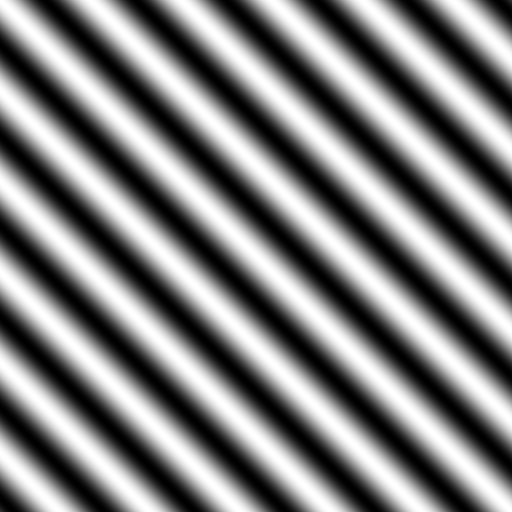</div>
The goal of this exercise is to study the limit conditions of sampling this image in order to avoid aliasing.

In [1]:
import numpy as np
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt
# for interactive ploting, see surf() below
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

def sinusoid2d(A, theta, size, T0, Te):
    """ double**2*int*double**2 -> Array[double] """
    ct = np.cos(theta/180*np.pi)
    st = np.sin(theta/180*np.pi)
    x, y = np.meshgrid(np.arange(0, size, Te), np.arange(0, size, Te))
    return A*np.cos(2*np.pi*(y*ct - x*st)/T0)

def shannonInterpolation(I, Ts, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Ts-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Ts-y)
    return np.matmul(X.T, np.matmul(I, Y))

def imshow(I,title=None):
    """ display an image """
    plt.figure(figsize=(500//80,500//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

def surf(Z,title=None):
    """ 3D plot of an image """
    X,Y = np.meshgrid(range(Z.shape[1]), range(Z.shape[0]))
    fig = plt.figure(figsize=(600/80,600/80))
    if title: plt.title(title)
    # ax = fig.gca(projection='3d')
    ax = plt.subplot(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()
    

    

1. We provide the function `sinusoid2d(A, theta, L, T0, Ts)` that allows sampling signal $s_\theta$ with a sampling period of `Ts` (the grid is regular with the sample sampling value for directions $u$ and $t$). Parameters `A`, `theta`, `L`, and `T0` respectively control the amplitude, orientation, and period ($T_0=\frac1{f_0}$) of signal $s_\theta$. Generate a pseudo continuous signal $s_{45}$ with `A=1`, `theta = 45`, `L = 512`, `T0 = 64` and `Ts=1`.


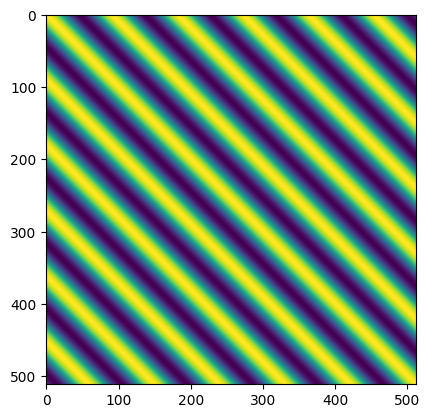

In [9]:
x = sinusoid2d(1, 45, 512, 64, 1)
plt.imshow(x)
plt.show()

2. (a) What is the maximal frequency of previous signal $s_{45}$ in direction $t$ (denoted $f_t^{\text{max}}$) and direction $u$ (denoted $f_u^{\text{max}}$)? Let $f_m = \max(f_t^{\text{max}},f_u^{\text{max}})$. Explain why $f_m$ can be used to derive the limit frequency (in sens of Shannon) for the sampling of $s_{45}$.

We can calculate the frequency in one direction as $f_t = \frac{f_0}{\sqrt{2}}$ and $f_u = \frac{f_0}{\sqrt{2}}$ so $f_m = \frac{f_0}{\sqrt{2}} = \frac{64}{\sqrt{2}} = 0.011048543456039804$

2. (b)  Sample $s_{45}$ with $f_s = 16 f_m$ and display the sampled signal.

0.011048543456039804
5.656854249492381


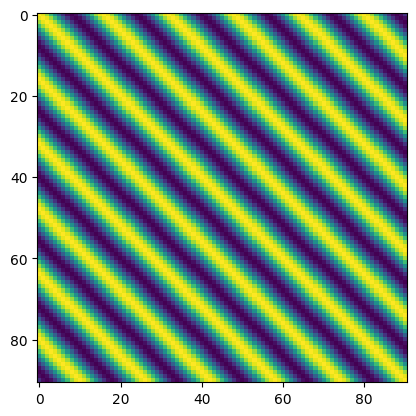

In [35]:
fm = 1 / ( np.sqrt(2) * 64 )
print(fm)
fs = 16 * fm
Ts = 1 / fs
print(Ts)
x = sinusoid2d(1, 45, 512, 64, Ts)
plt.imshow(x)
plt.show()

2. (c) Compute the Fourier transform of the sampled signal and display frequencies. One can use `surf()` function for an interactive 3D plot.

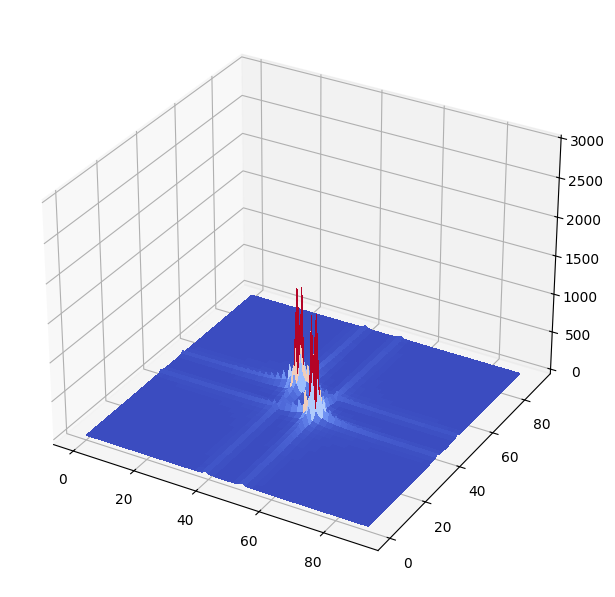

In [36]:
def Ft(x):
    f = np.fft.fft2(x)
    f_sh = np.fft.fftshift(f)
    return f_sh

def showFt(x):
    f_sh = Ft(x)
    f_sh_mod = np.abs(f_sh)
    surf(f_sh_mod)
    
showFt(x)

2. (d) Comment the spectrum:
    - verify the presence of the two Dirac peaks
    - for various values of $T_s$, observe changes in the spectrum. Compare with the spectrum of the continuous signal ($s_{45}$). What is the origin of these differences?
    - Why, aside from the two Dirac peaks, there are some structures? Explain the origin of these lobes.
    - Increase $T_0$ in order to obtain a unique peak. Explain the origin of this fusion. Verify the limit value of $T_0$ for which the two peaks interfere.

- Pictures 1, 2
- The higher the frequency, the closer we get to the continuous case, which is two infinite peaks
- Because of the sampling
- $T_0 = 1 / f_m$ is the limit case, **given by the Shannon theorem**

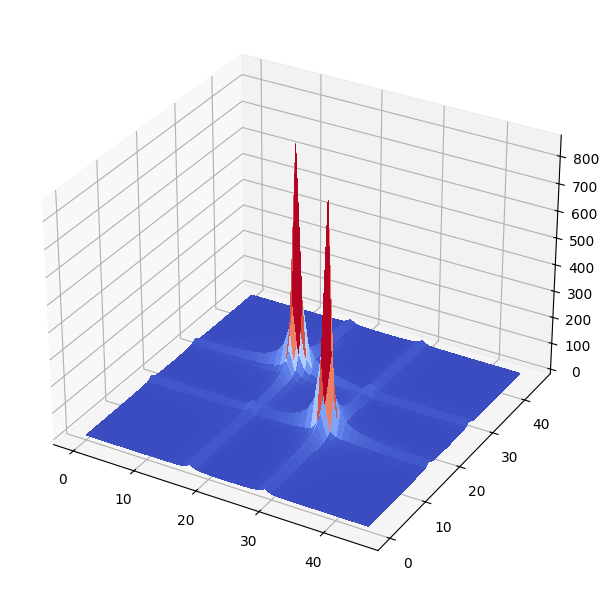

858.1493295527341


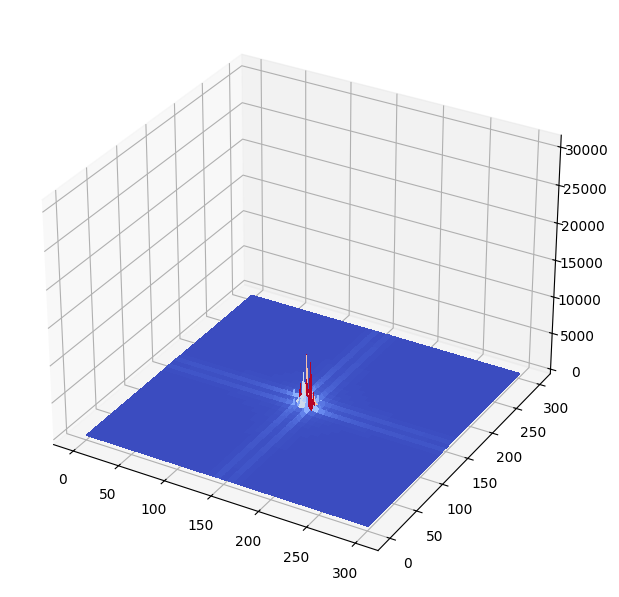

30905.132510801603


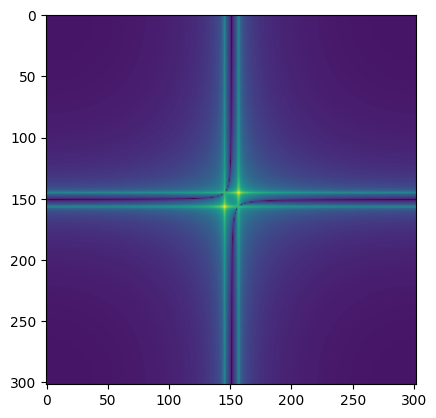

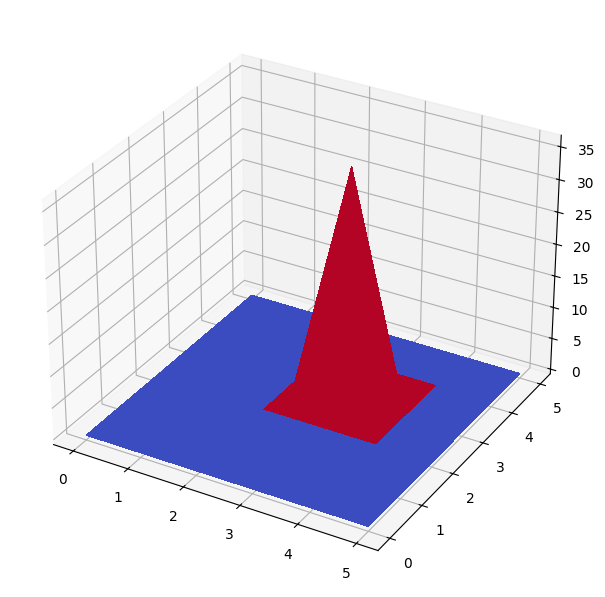

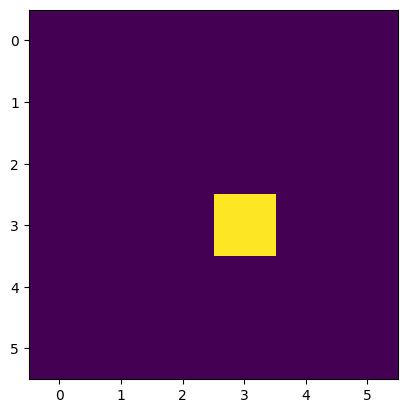

In [39]:
Ts2 = 2 * Ts
x = sinusoid2d(1, 45, 512, 64, Ts2)
showFt(x)
f = Ft(x)
print(np.abs(f).max())

Ts01 = 0.3 * Ts
x = sinusoid2d(1, 45, 512, 64, Ts01)
showFt(x)
f = Ft(x)
print(np.abs(f).max())
plt.imshow(np.log(1 + np.abs(f)))
plt.show()


Ts30 = 1 / fm
x = sinusoid2d(1, 45, 512, 64, Ts30)
showFt(x)
f = Ft(x)
plt.imshow(np.log(1 + np.abs(f)))
plt.show()

3. (a) Sample $s_{45}$ with $f_s=4 f_m$ and display the sampled signal.

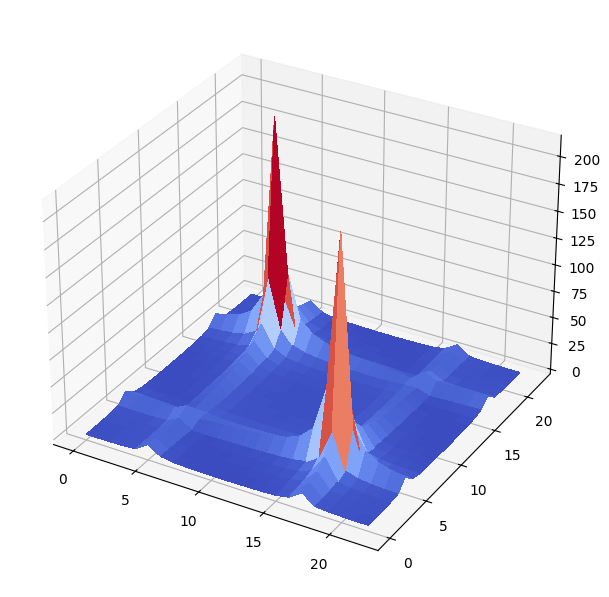

In [40]:
x = sinusoid2d(1, 45, 512, 64, 1 /(4 * fm))
showFt(x)

3. (b) Write a function `error()` implementing the relative average error $\displaystyle\epsilon_r = \frac 1{2AL^2}\sum_{k=0}^L\sum_{l=0}^L |x_r(k,l)-x_d(k,l)|$.

In [41]:
def error(a, b):
    assert(a.shape == b.shape)
    s = 0
    for k in range(a.shape[0]):
        for l in range(a.shape[1]):
             s += np.abs(a[k, l] - b[k, l])
    A = 1
    return 1 / (2 * A * a.shape[0] * a.shape[1])

3. (c) Reconstruct the sampled signal. Display original and reconstructed signal.
   Print the relative average error between the original and reconstructed images. What is the origin of this error?

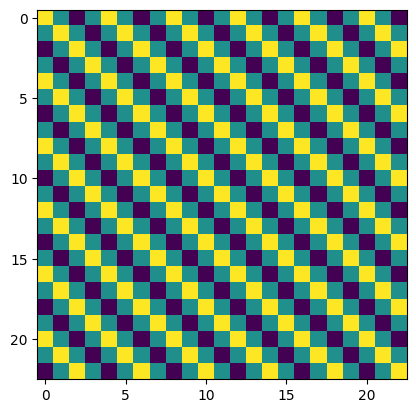

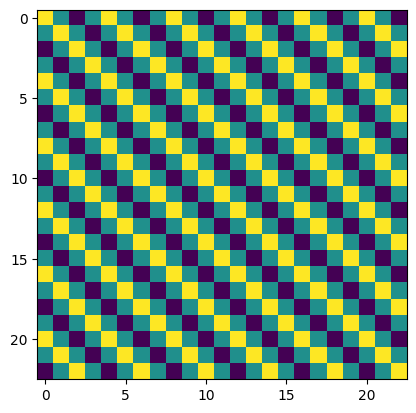

0.000945179584120983


In [49]:
f = np.fft.fft2(x)
xr = np.fft.ifft2(f)

plt.imshow(x)
plt.show()

plt.imshow(xr.real)
plt.show()

e = error(x, xr)
print(e)

4. Same question than 3. with $f_s = \frac32f_m$. Comment the effects of aliasing.

5. Consider the continuous signal with an oriention of $\theta=10°$. What is the value of $f_m$? With a sampling of $\frac32 f_s$ what is the additional drawback appearing after the reconstruction? Explain.

6. Write a function `shannonInterpolationLoop()` implementing equation (1) using four nested loops, in a C way. Compare and discuss the run time of this function and  `shannonInterpolation()` on a small signal ($L=64$). Runtime can be measured using `tic()` and `tac()` functions.

In [1]:
from time import process_time
mytime = 0
def tic():
    """ NoneType -> NoneType """
    global mytime
    mytime = process_time()
def tac():
    """ NoneType -> int """
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

### your code starts below



## Exercise 2: aliasing on natural images

In this exercise, we study aliasing on image `img/barbara.png`. Aliasing occurring with subsample of image, we propose to write a code that implements a subsample (using function `subSample2()` of factor 2 on the image.  

1. Explain what is a subsample of factor 2 and the impact when applied on an image. 

2. Write a code that
 - iterates the subsampling process
 - at each iteration, computes the Fourier transform of the subsampled image

   Display subsampled images and their spectrum. Describe and interpret the effects of aliasing. Why aliasing is a drawback ?

3. Same question with the image `img/mandrill.png`.

In [ ]:
mandrill = np.array(Image.open('img/mandrill.png'))
### your code and comments start below

